# Тарасова Анастасия
## HW-5

# Практика

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [62]:
# ваш код тут
# например вот такое распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html#scipy.stats.cosine
cosine_rv = sts.cosine()
sample = cosine_rv.rvs(100)
sample

array([-0.4379707 ,  1.03979903,  0.50161817,  1.21719483, -1.5088615 ,
        0.3235558 , -0.6724493 , -1.63691044,  2.41581037, -0.53201163,
        1.07408561, -1.02003149, -0.24084331, -0.38748796, -0.08797801,
        1.55692262,  1.65191105, -2.14710573,  1.26279053,  0.33490601,
        0.6458982 , -0.67383074, -0.73871428, -0.5416074 ,  0.48292733,
       -1.45195002, -0.9442874 , -0.73888851,  2.04450478, -1.48492709,
        0.26362019,  0.35699751, -0.34545324,  1.03960095, -0.66116981,
        1.77033924, -0.29058322,  0.11383939,  1.60237638,  0.47105769,
       -0.06443296,  2.03161275,  1.78184241, -0.43690351, -0.13921951,
       -1.64858951, -0.5691246 , -1.53973175, -2.76590893,  0.07479884,
       -1.62574047, -1.15765772,  0.59070515,  0.4692322 , -0.31390047,
       -1.00230215,  1.63647964,  0.96073766,  0.8411351 ,  0.83314489,
        0.22619849,  0.29356907,  0.32165866, -0.9212205 , -0.67333216,
        1.47848993,  0.11588906,  1.56068726,  0.84710426,  0.46

In [63]:
sample.dtype

dtype('float64')

In [64]:
real_mean = cosine_rv.mean() 
real_mean # настоящее среднее случайной величины

0.0

In [65]:
real_var = cosine_rv.var() 
real_var# настоящая дисперсия случайной величины

1.2898681336964528

### Постройте гистограмму выборки и теоретическую плотность распределения

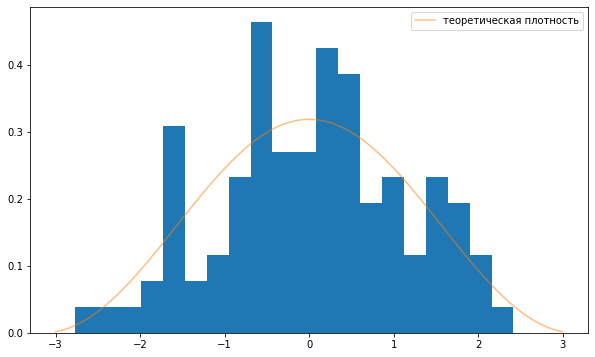

In [66]:
# ваш код тут
plt.figure(figsize = (10,6))
plt.hist(sample, density=True, bins = 20)
x = np.linspace(-3,3,100)
pdf = cosine_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()
plt.show()

In [67]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

0.04058276276781272
1.24552097310165


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

In [68]:
import random

In [103]:
def bootstrap(sample_, n):
    v = []
    for i in range(n):
        v.append(random.choice(sample_))
    plt.title(f'Объем выборки {n}')
    plt.hist(v, density=True,bins = 20,alpha = 0.7)

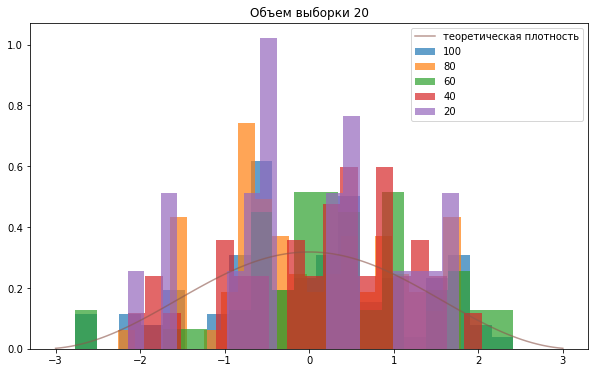

In [105]:
# ваш код тут
l = len(sample)
plt.figure(figsize = (10,6))
for i in range(5):
    bootstrap(sample, l)
    l -=20      
x = np.linspace(-3,3,100)
pdf = cosine_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.6)
plt.legend(['теоретическая плотность',100,80,60,40,20])

plt.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

**ответ:**
Чем больше значений в выборке, тем лучше работает апроксимация. Если в выборке было бы не 100, а 1000 значений, то результат был бы лучше. В нашем случае при размере выборки 100 апроксимация работает не очень хорошо относительно теоретического распределения, т.к. сама выборка ведет себя также. 

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [71]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df=pd.read_csv(url)
df.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [111]:
import statsmodels.stats.weightstats as ssw

def interval(list_p, type_ = 'interval'):
    if type_ == 'interval':
        result = sts.t.interval(alpha=0.95, df=len(list_p)-1,
                  loc=np.mean(list_p),
                  scale=np.std(list_p, ddof=1)/np.sqrt(len(list_p)),)
        return result
    elif type_ == 'zconfint':
        result = ssw._zconfint_generic(np.mean(list_p),  np.std(list_p, ddof=1), alpha=0.95, alternative='two-sided')
        return result

In [122]:
interval(df['total day calls'],'interval')

(99.75406523041279, 101.11722189830009)

In [123]:
mu = df['total day calls'].mean()
sigma = np.sqrt(np.var(df['total day calls']))
norm_rv = sts.norm(mu, sigma)
alpha = 0.05

sample = df['total day calls']
pdf = norm_rv.pdf(sample)
q_a_m = norm_rv.ppf(alpha/2)
q_a_p = norm_rv.ppf(1 - alpha/2)
to_fill = np.linspace(q_a_m, q_a_p, 100)
print ("Интервал %.3f ... %.3f" % (sample[np.argmax(pdf)] - q_a_m * np.sqrt(sigma/len(sample)) ,
                                            sample[np.argmax(pdf)] + q_a_p * np.sqrt(sigma/len(sample))))

Интервал 95.259 ... 110.845


In [124]:
interval(df['total day calls'],'zconfint')

(99.17717595744557, 101.69411117126731)

In [125]:
110.845 - 95.259

15.585999999999999

In [126]:
99.177 - 101.694

-2.516999999999996

In [127]:
99.754 - 101.117

-1.3629999999999995

**Вывод:** 
Для построение доверительного интервала было использовано 3 способа
* Интервалная оценка (99.754, 101.117)
* Расчет по формуле (95.259, 110.845)
* методом \_zconfint_generic (99.177, 101.694)

самый широкий и смещенный влево оказался интервал рассчитанный по формуле, интервальная оценка оказалась самой строгой.

